# Simple Stock Technical Analysis

In [1]:
library(quantmod)
library(TTR)

Warning message:
"package 'quantmod' was built under R version 3.5.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.5.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.5.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.5.3"Version 0.4-0 included new data defaults. See ?getSymbols.


In [2]:
getSymbols('AAPL', src = 'yahoo', from = as.Date('2018-01-01'), to = as.Date('2019-01-01'))

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Warning message:
"AAPL download failed; trying again."

[1] "AAPL"

In [3]:
AAPL <- na.omit(AAPL)

In [4]:
head(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2018-01-02    170.16    172.30   169.26     172.26    25555900      167.7019
2018-01-03    172.53    174.55   171.96     172.23    29517900      167.6727
2018-01-04    172.54    173.47   172.08     173.03    22434600      168.4515
2018-01-05    173.44    175.37   173.05     175.00    23660000      170.3694
2018-01-08    174.35    175.61   173.93     174.35    20567800      169.7366
2018-01-09    174.55    175.06   173.41     174.33    21584000      169.7171

In [5]:
# Simple Moving Average
# Add another columns to origianl data
AAPL$SMA <- SMA(Cl(AAPL),n=20)

In [6]:
tail(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2018-12-21    156.86    158.16   149.63     150.73    95744600      148.9446
2018-12-24    148.15    151.55   146.59     146.83    37169200      145.0908
2018-12-26    148.30    157.23   146.72     157.17    58582500      155.3083
2018-12-27    155.84    156.77   150.07     156.15    53117100      154.3004
2018-12-28    157.50    158.52   154.55     156.23    42291400      154.3795
2018-12-31    158.53    159.36   156.48     157.74    35003500      155.8716
                SMA
2018-12-21 170.3580
2018-12-24 169.0850
2018-12-26 168.2125
2018-12-27 167.3080
2018-12-28 166.0725
2018-12-31 164.9820

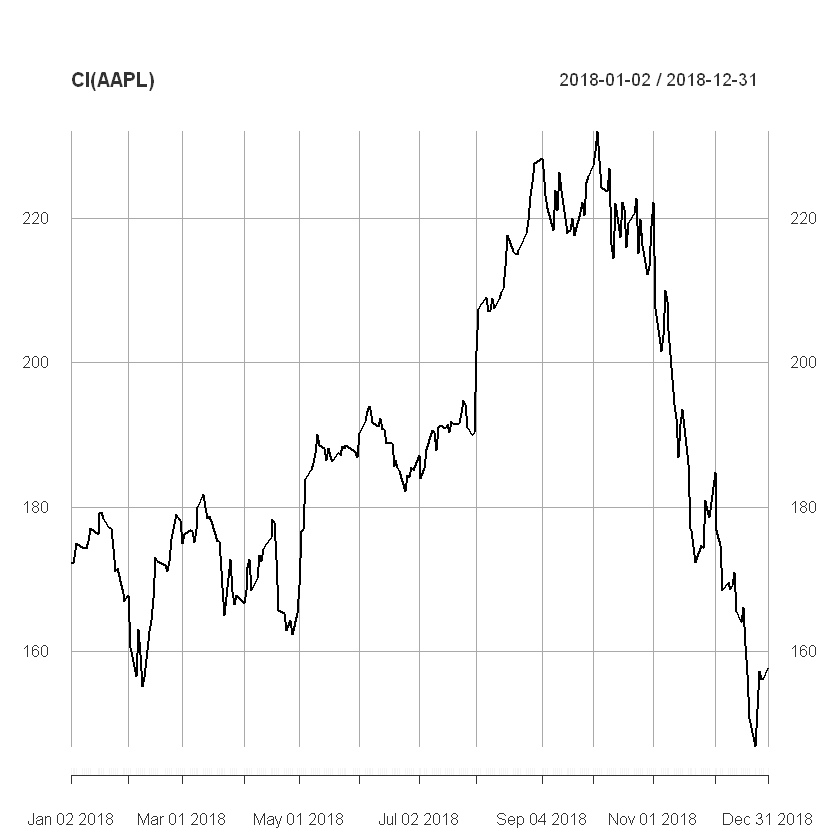

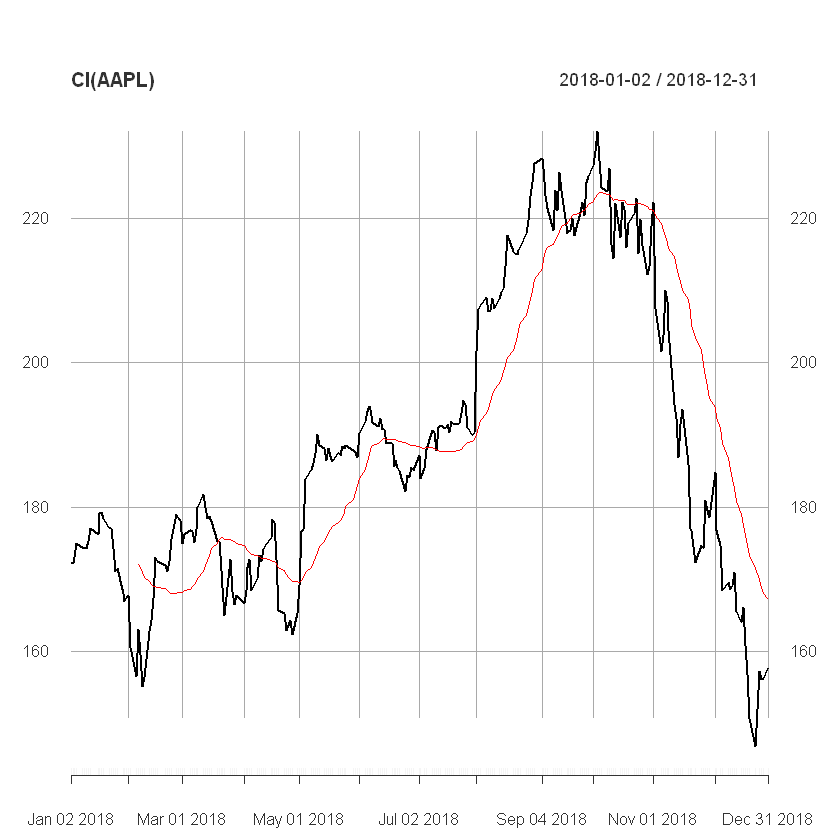

In [7]:
plot(Cl(AAPL))
lines(SMA(Cl(AAPL), n = 25), col = "red")

In [8]:
sma <-SMA(Cl(AAPL),n=20)
tail(sma,n=5)

                SMA
2018-12-24 169.0850
2018-12-26 168.2125
2018-12-27 167.3080
2018-12-28 166.0725
2018-12-31 164.9820

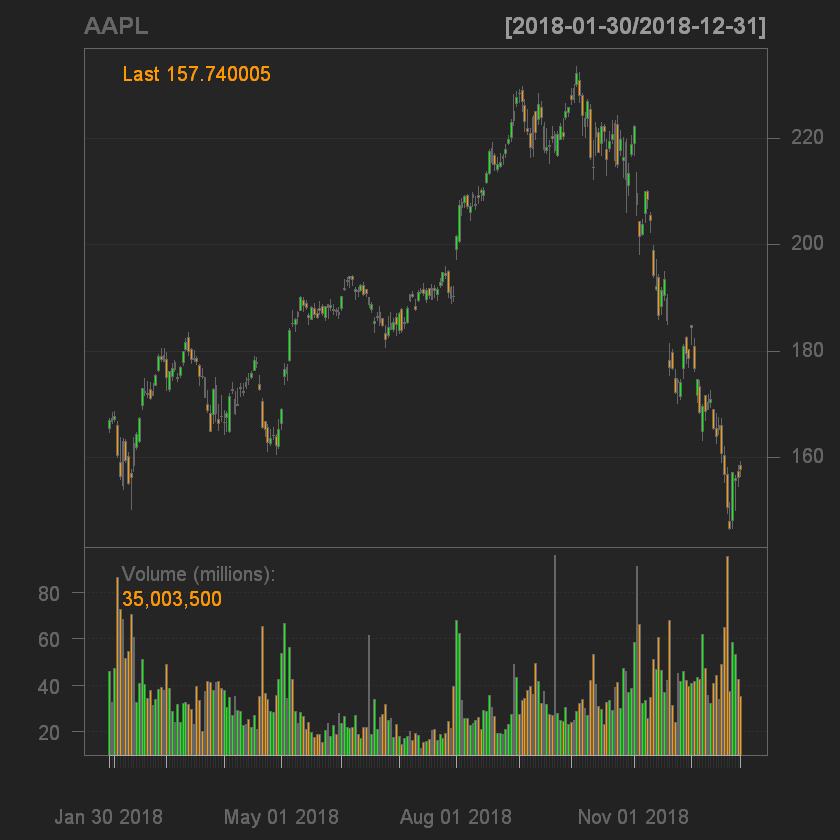

In [9]:
chartSeries(AAPL, theme=chartTheme('black'))

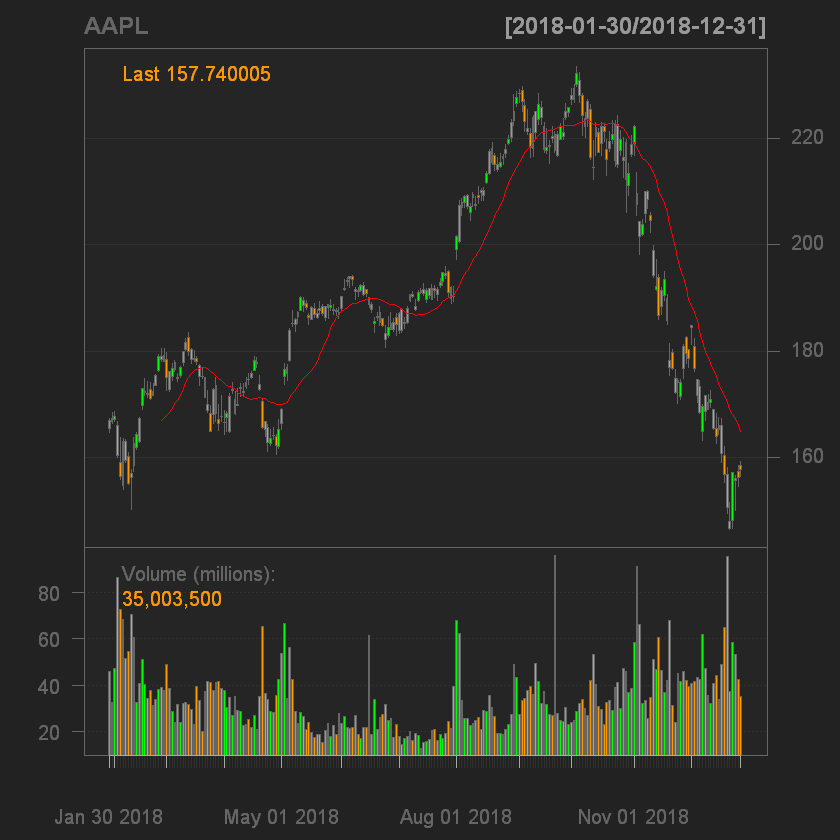

In [10]:
addSMA(n=20,on=1,col = "red")

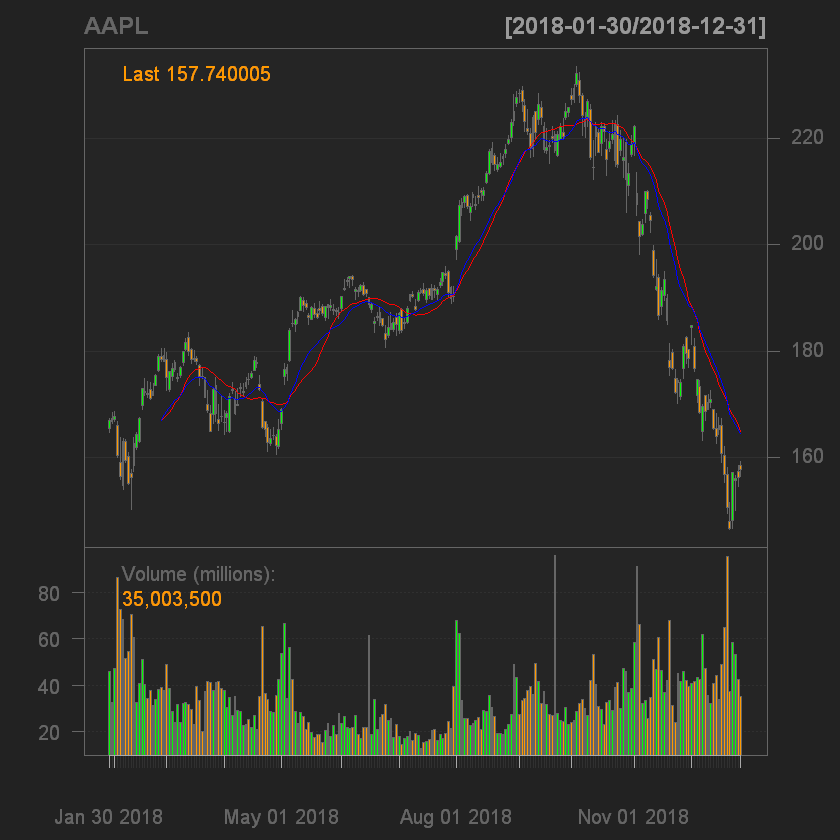

In [11]:
addEMA(n=20,on=1,col = "blue")

In [12]:
# Create funciton of Simple Moving Average
sma <- function(x,n=5){stats::filter(x,rep(1/n,n), sides=2)}

In [13]:
sma <- sma(AAPL$AAPL.Adjusted,20)

In [14]:
sma

A Time Series:
  [1]       NA       NA       NA       NA       NA       NA       NA       NA
  [9]       NA 169.7210 169.4859 169.2693 168.6594 167.7583 167.2073 166.4874
 [17] 165.5557 164.6682 164.0005 163.4563 162.9186 162.6477 162.3884 162.1718
 [25] 161.9152 161.8657 162.1142 162.5128 163.0559 163.6340 164.0373 164.4826
 [33] 165.3121 166.3294 166.9483 167.8304 169.0748 170.3118 171.1554 171.8445
 [41] 172.3959 172.6417 172.7820 172.9477 172.9574 172.7790 172.2629 171.9599
 [49] 171.4687 170.8998 170.5469 170.0811 169.6691 169.4218 169.3128 168.8944
 [57] 168.4091 167.9951 167.6271 167.4169 167.2253 167.1178 167.2615 167.3886
 [65] 167.4634 167.3104 167.3250 166.8446 166.6154 166.5049 166.2380 166.1686
 [73] 166.2033 166.4458 166.6457 167.4008 168.1393 168.7649 169.4941 170.2712
 [81] 170.9842 171.6223 172.0582 172.5990 173.3278 174.3693 175.4990 176.7180
 [89] 177.9612 179.1663 180.4853 181.6272 182.5619 183.1005 183.7889 184.2160
 [97] 184.6508 185.0749 185.4095 185.5268 185.6563 185.8589 186.0680 186.1965
[105] 186.2873 186.4065 186.3113 186.2789 186.1366 185.9782 185.6637 185.4934
[113] 185.3295 185.2623 185.0106 184.7825 184.3218 183.9008 183.6314 183.5765
[121] 183.5333 183.3174 183.3336 183.3596 183.4612 183.5942 183.8252 184.0892
[129] 184.3826 184.7108 185.2422 185.7520 186.2451 186.5139 186.7495 186.9020
[137] 187.7646 188.8435 189.8258 190.7330 191.5553 192.5056 193.3814 194.2120
[145] 195.1291 196.0631 197.0727 198.1613 199.4813 200.6885 201.8069 202.8365
[153] 203.9176 205.1902 206.6030 208.0838 209.1760 210.0802 211.0830 212.0688
[161] 213.0773 213.8934 214.5408 215.0726 215.8101 216.3675 217.1636 217.6816
[169] 217.6963 217.8332 217.9972 218.2424 218.3492 218.5772 218.7864 218.8219
[177] 218.9189 218.9538 218.9356 218.9809 219.2369 219.4777 219.6249 219.8928
[185] 220.0415 219.8096 219.2207 219.1355 219.1099 219.3024 219.4413 219.2438
[193] 219.3251 219.3182 219.3448 219.0823 218.8288 218.3640 217.6245 216.8377
[201] 216.1873 215.9032 215.0755 213.9835 212.8461 212.5305 212.2729 211.4395
[209] 210.3311 208.8909 207.2298 206.0510 204.8149 203.1339 200.9118 199.0559
[217] 196.7463 194.7242 192.8831 191.3210 189.4163 187.2984 186.2144 185.0188
[225] 183.6185 181.6061 179.6847 177.9139 176.6752 175.6238 174.5705 173.2132
[233] 171.8565 170.6228 169.6272 168.3401 167.0822 166.2201 165.3263 164.1054
[241] 163.0278       NA       NA       NA       NA       NA       NA       NA
[249]       NA       NA       NA

In [15]:
# Drop NA
na.omit(sma)

A Time Series:
  [1] 169.7210 169.4859 169.2693 168.6594 167.7583 167.2073 166.4874 165.5557
  [9] 164.6682 164.0005 163.4563 162.9186 162.6477 162.3884 162.1718 161.9152
 [17] 161.8657 162.1142 162.5128 163.0559 163.6340 164.0373 164.4826 165.3121
 [25] 166.3294 166.9483 167.8304 169.0748 170.3118 171.1554 171.8445 172.3959
 [33] 172.6417 172.7820 172.9477 172.9574 172.7790 172.2629 171.9599 171.4687
 [41] 170.8998 170.5469 170.0811 169.6691 169.4218 169.3128 168.8944 168.4091
 [49] 167.9951 167.6271 167.4169 167.2253 167.1178 167.2615 167.3886 167.4634
 [57] 167.3104 167.3250 166.8446 166.6154 166.5049 166.2380 166.1686 166.2033
 [65] 166.4458 166.6457 167.4008 168.1393 168.7649 169.4941 170.2712 170.9842
 [73] 171.6223 172.0582 172.5990 173.3278 174.3693 175.4990 176.7180 177.9612
 [81] 179.1663 180.4853 181.6272 182.5619 183.1005 183.7889 184.2160 184.6508
 [89] 185.0749 185.4095 185.5268 185.6563 185.8589 186.0680 186.1965 186.2873
 [97] 186.4065 186.3113 186.2789 186.1366 185.9782 185.6637 185.4934 185.3295
[105] 185.2623 185.0106 184.7825 184.3218 183.9008 183.6314 183.5765 183.5333
[113] 183.3174 183.3336 183.3596 183.4612 183.5942 183.8252 184.0892 184.3826
[121] 184.7108 185.2422 185.7520 186.2451 186.5139 186.7495 186.9020 187.7646
[129] 188.8435 189.8258 190.7330 191.5553 192.5056 193.3814 194.2120 195.1291
[137] 196.0631 197.0727 198.1613 199.4813 200.6885 201.8069 202.8365 203.9176
[145] 205.1902 206.6030 208.0838 209.1760 210.0802 211.0830 212.0688 213.0773
[153] 213.8934 214.5408 215.0726 215.8101 216.3675 217.1636 217.6816 217.6963
[161] 217.8332 217.9972 218.2424 218.3492 218.5772 218.7864 218.8219 218.9189
[169] 218.9538 218.9356 218.9809 219.2369 219.4777 219.6249 219.8928 220.0415
[177] 219.8096 219.2207 219.1355 219.1099 219.3024 219.4413 219.2438 219.3251
[185] 219.3182 219.3448 219.0823 218.8288 218.3640 217.6245 216.8377 216.1873
[193] 215.9032 215.0755 213.9835 212.8461 212.5305 212.2729 211.4395 210.3311
[201] 208.8909 207.2298 206.0510 204.8149 203.1339 200.9118 199.0559 196.7463
[209] 194.7242 192.8831 191.3210 189.4163 187.2984 186.2144 185.0188 183.6185
[217] 181.6061 179.6847 177.9139 176.6752 175.6238 174.5705 173.2132 171.8565
[225] 170.6228 169.6272 168.3401 167.0822 166.2201 165.3263 164.1054 163.0278

In [16]:
library(PerformanceAnalytics)

Warning message:
"package 'PerformanceAnalytics' was built under R version 3.5.3"
Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



In [17]:
# Create Rolling Windows
apply.rolling(AAPL$AAPL.Adjusted, width=20, FUN = "mean")

              calcs
2018-01-02       NA
2018-01-03       NA
2018-01-04       NA
2018-01-05       NA
2018-01-08       NA
2018-01-09       NA
2018-01-10       NA
2018-01-11       NA
2018-01-12       NA
2018-01-16       NA
2018-01-17       NA
2018-01-18       NA
2018-01-19       NA
2018-01-22       NA
2018-01-23       NA
2018-01-24       NA
2018-01-25       NA
2018-01-26       NA
2018-01-29       NA
2018-01-30 169.7210
2018-01-31 169.4859
2018-02-01 169.2693
2018-02-02 168.6594
2018-02-05 167.7583
2018-02-06 167.2073
2018-02-07 166.4874
2018-02-08 165.5557
2018-02-09 164.6682
2018-02-12 164.0005
2018-02-13 163.4563
2018-02-14 162.9186
2018-02-15 162.6477
2018-02-16 162.3884
2018-02-20 162.1718
2018-02-21 161.9152
2018-02-22 161.8657
2018-02-23 162.1142
2018-02-26 162.5128
2018-02-27 163.0559
2018-02-28 163.6340
2018-03-01 164.0373
2018-03-02 164.4826
2018-03-05 165.3121
2018-03-06 166.3294
2018-03-07 166.9483
2018-03-08 167.8304
2018-03-09 169.0748
2018-03-12 170.3118
2018-03-13 171.1554


In [18]:
AAPL$AAPL.SMA <- apply.rolling(AAPL$AAPL.Adjusted, width=20, FUN = "mean")

In [19]:
tail(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2018-12-21    156.86    158.16   149.63     150.73    95744600      148.9446
2018-12-24    148.15    151.55   146.59     146.83    37169200      145.0908
2018-12-26    148.30    157.23   146.72     157.17    58582500      155.3083
2018-12-27    155.84    156.77   150.07     156.15    53117100      154.3004
2018-12-28    157.50    158.52   154.55     156.23    42291400      154.3795
2018-12-31    158.53    159.36   156.48     157.74    35003500      155.8716
                SMA AAPL.SMA
2018-12-21 170.3580 168.3401
2018-12-24 169.0850 167.0822
2018-12-26 168.2125 166.2201
2018-12-27 167.3080 165.3263
2018-12-28 166.0725 164.1054
2018-12-31 164.9820 163.0278

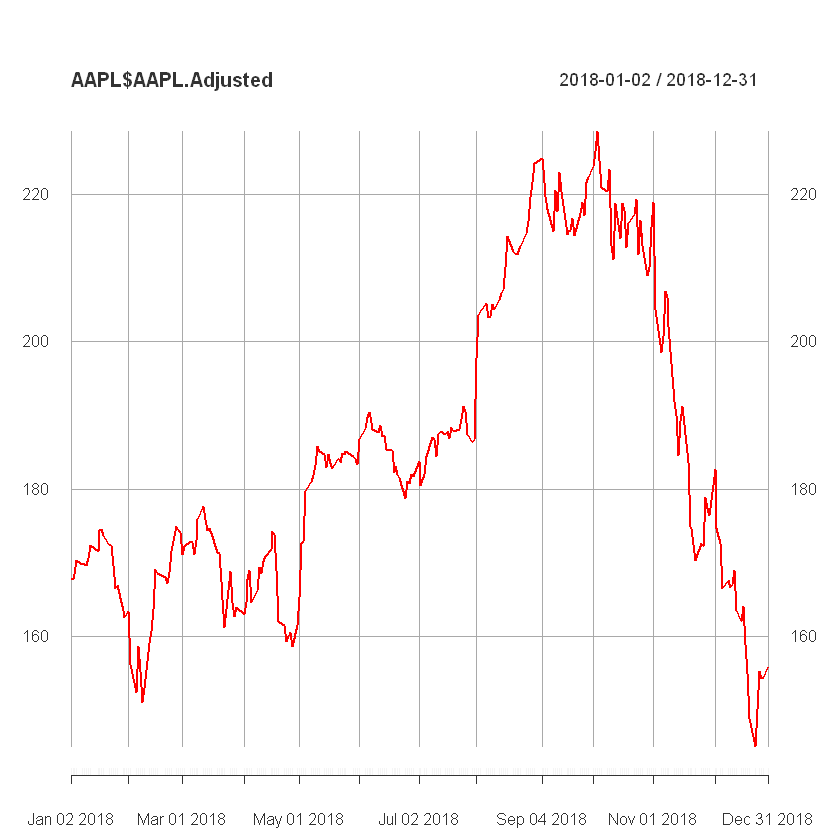

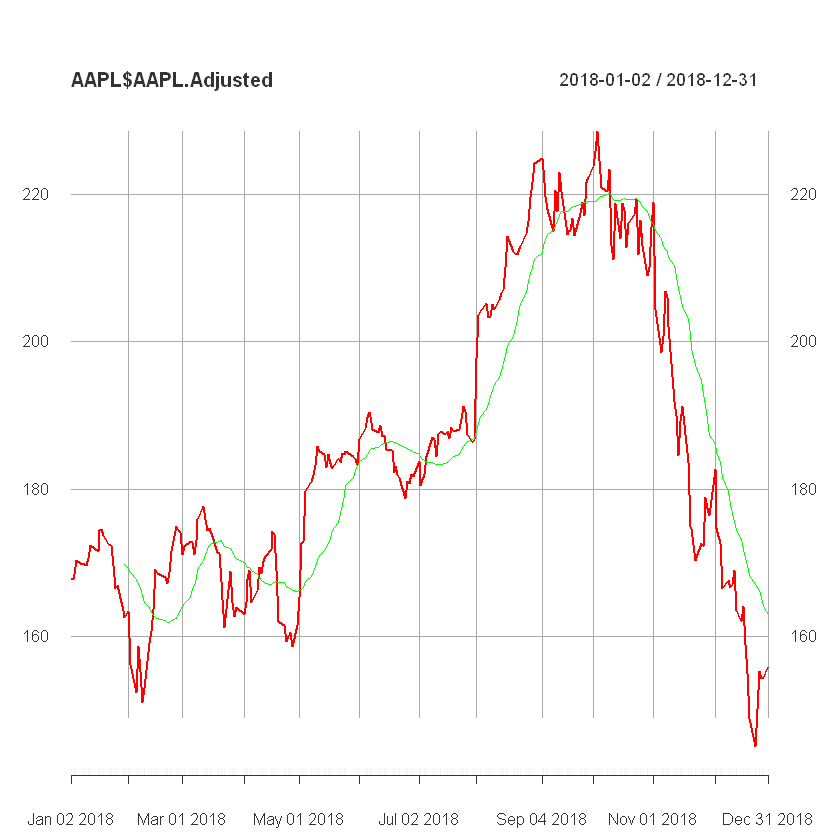

In [20]:
plot(AAPL$AAPL.Adjusted,type="l",col="red")
lines(AAPL$AAPL.SMA,col="green")

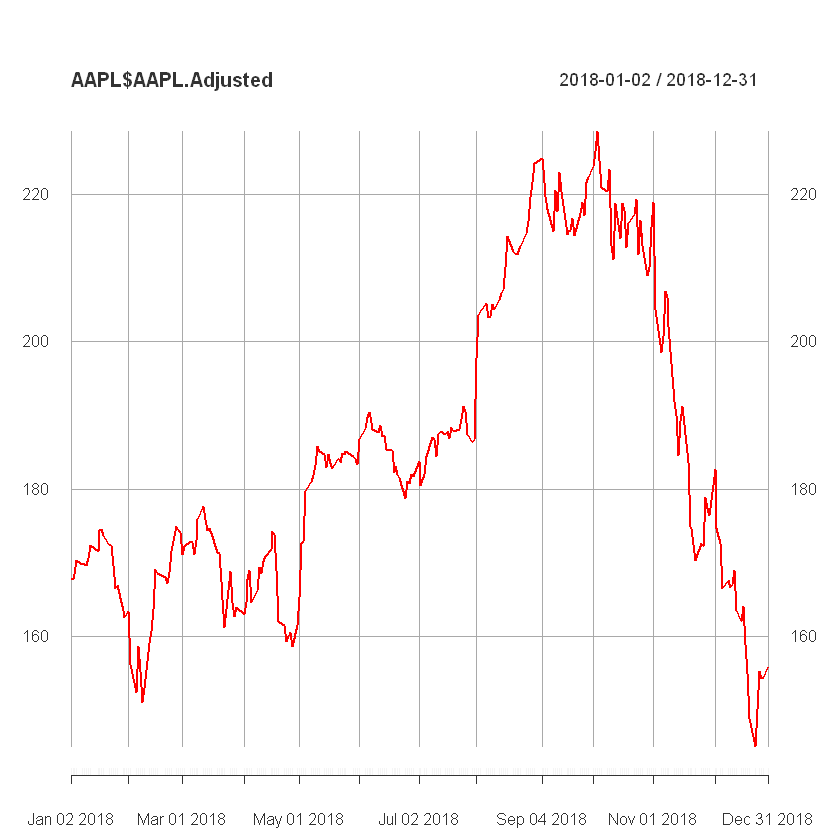

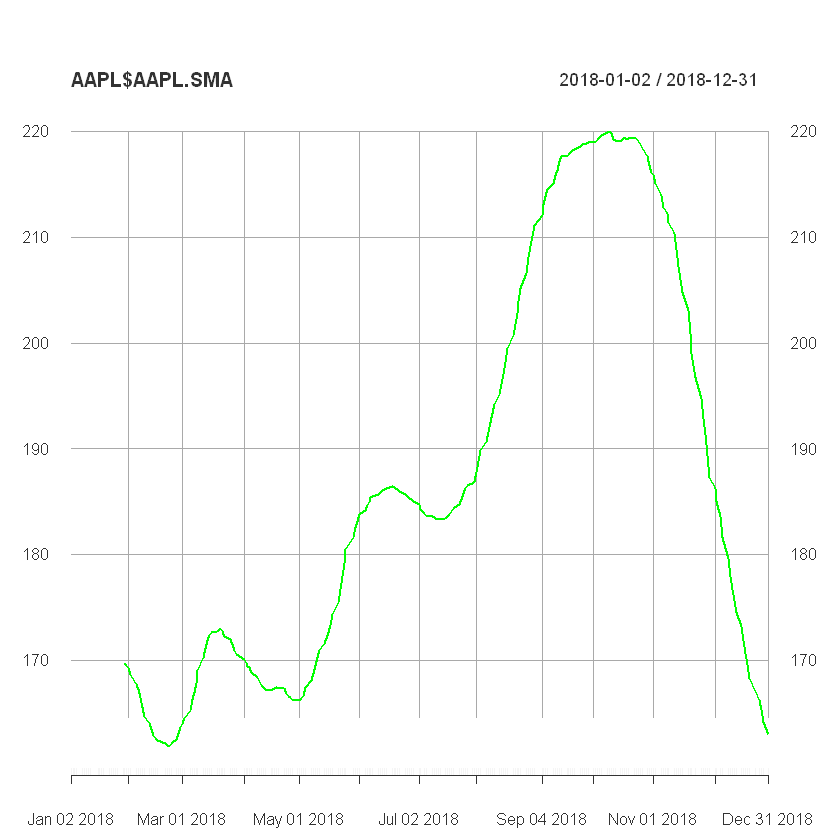

In [21]:
plot(AAPL$AAPL.Adjusted, type="l", col="red" )
par(new=TRUE)
plot(AAPL$AAPL.SMA, type="l", col="green" )